# Introduction to Regression Analysis

## 📌 What is Linear Regression?

Linear regression is a statistical method used to model and understand the **relationship between a dependent variable $y$** and one or more **independent variables $x$**. 

- In **simple linear regression**, we have **one predictor** ($x$).  
- The relationship is assumed to be **linear**, meaning the effect of $x$ on $y$ is additive and constant.  
- The model also assumes that the **errors** $\epsilon_i$ are:
  1. Normally distributed
  2. Independent of each other
  3. Have constant variance (homoscedasticity)


## 📌 Mathematical Model

The **linear regression equation** is:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

Where:  
- $y_i$: observed value of the dependent variable for observation $i$  
- $x_i$: value of the independent variable for observation $i$  
- $\beta_0$: intercept (value of $y$ when $x = 0$)  
- $\beta_1$: slope (change in $y$ for a one-unit change in $x$)  
- $\epsilon_i$: error term representing the deviation of the observation from the true line

The **predicted value** of $y$ (denoted $\hat{y}_i$) is:

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i
$$


## 📌 Estimating Coefficients Using Ordinary Least Squares (OLS)

We want to find the line that **best fits the data**. OLS does this by **minimizing the sum of squared errors (SSE)**:

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

The formulas for the estimated coefficients are:

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

Where:  
- $\bar{x}$ = mean of $x$  
- $\bar{y}$ = mean of $y$  

**Interpretation**:  
- $\hat{\beta}_1 > 0$ → $y$ increases as $x$ increases  
- $\hat{\beta}_1 < 0$ → $y$ decreases as $x$ increases  
- $\hat{\beta}_0$ gives the **starting point** of $y$ when $x = 0$


## 📌 Understanding the Error Term

The error term $\epsilon_i = y_i - \hat{y}_i$ represents:

1. **Random noise** in the data  
2. Effects of **variables not included** in the model  
3. Measurement errors in $x$ or $y$  

Key assumptions for valid OLS estimates:  
- $E[\epsilon_i] = 0$ → errors have zero mean  
- $Var(\epsilon_i) = \sigma^2$ → constant variance  
- Errors are uncorrelated → $Cov(\epsilon_i, \epsilon_j) = 0$ for $i \neq j$  
- Linear relationship between $x$ and $y$


## 📌 Why Minimize Squared Errors?

- Squaring ensures all deviations are positive  
- Larger deviations are **penalized more heavily**, which makes the line fit better  
- Leads to a **unique solution** for $\hat{\beta}_0$ and $\hat{\beta}_1$ using derivatives


## 📌 Intuition for the Slope

- The slope formula:

$$
\hat{\beta}_1 = \frac{\text{Cov}(x, y)}{\text{Var}(x)} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

- Numerator = how $x$ and $y$ **co-vary**  
- Denominator = how $x$ **varies**  
- Interpretation: for each 1-unit increase in $x$, $y$ changes by $\hat{\beta}_1$ units on average


## 📌 Intuition for the Intercept

- $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$  

- It **anchors the regression line** at the center of the data  
- Ensures the line passes through the point $(\bar{x}, \bar{y})$


In [1]:
# Example Data: Study Hours vs Test Scores
hours_studied <- c(2, 4, 6, 8, 10, 12, 14)
test_scores <- c(50, 55, 65, 70, 80, 85, 90)

# Combine into data frame
study_data <- data.frame(Hours = hours_studied, Score = test_scores)

# Step 1: Calculate means
mean_hours <- mean(study_data$Hours)
mean_score <- mean(study_data$Score)
print(paste("Mean Hours:", mean_hours))
print(paste("Mean Score:", mean_score))

# Step 2: Calculate slope (beta1)
beta1 <- sum((study_data$Hours - mean_hours) * (study_data$Score - mean_score)) /
         sum((study_data$Hours - mean_hours)^2)
print(paste("Slope (Beta1):", beta1))

# Step 3: Calculate intercept (beta0)
beta0 <- mean_score - beta1 * mean_hours
print(paste("Intercept (Beta0):", beta0))

# Step 4: Calculate predicted values
study_data$Predicted <- beta0 + beta1 * study_data$Hours
print("Predicted Scores:")
print(study_data$Predicted)

[1] "Mean Hours: 8"
[1] "Mean Score: 70.7142857142857"
[1] "Slope (Beta1): 3.48214285714286"
[1] "Intercept (Beta0): 42.8571428571428"
[1] "Predicted Scores:"
[1] 49.82143 56.78571 63.75000 70.71429 77.67857 84.64286 91.60714


In [2]:
# Built-in linear model
model <- lm(Score ~ Hours, data = study_data)
summary(model)


Call:
lm(formula = Score ~ Hours, data = study_data)

Residuals:
      1       2       3       4       5       6       7 
 0.1786 -1.7857  1.2500 -0.7143  2.3214  0.3571 -1.6071 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.8571     1.3832   30.98 6.57e-07 ***
Hours         3.4821     0.1546   22.52 3.21e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.637 on 5 degrees of freedom
Multiple R-squared:  0.9902,	Adjusted R-squared:  0.9883 
F-statistic:   507 on 1 and 5 DF,  p-value: 3.211e-06


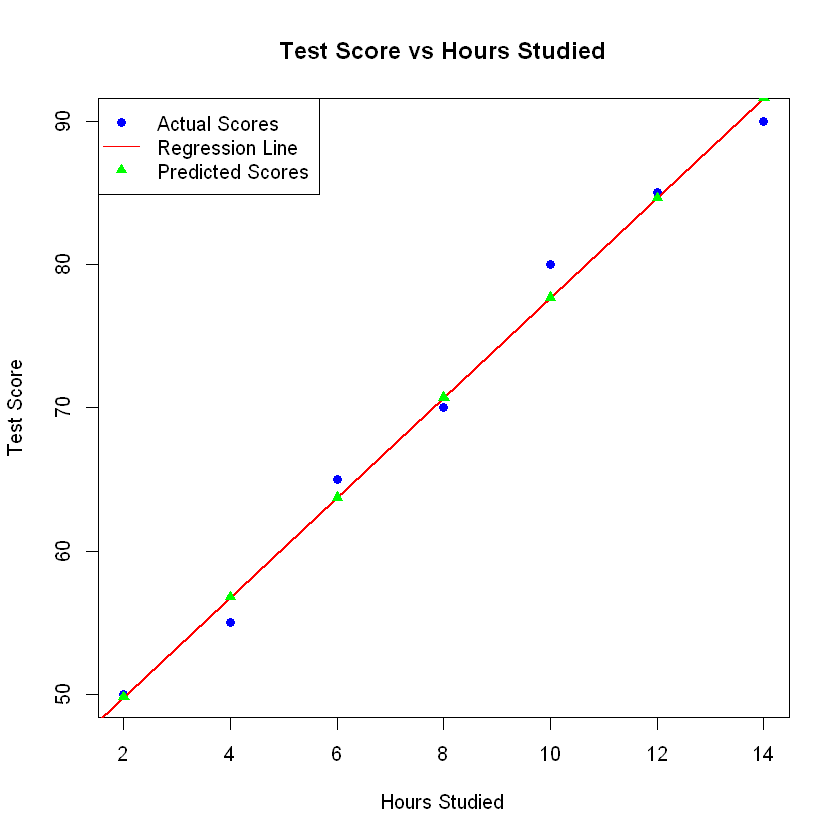

In [4]:
# Scatter plot of actual vs predicted
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
plot(study_data$Hours, study_data$Score,
     main = "Test Score vs Hours Studied",
     xlab = "Hours Studied",
     ylab = "Test Score",
     pch = 19, col = "blue")

# Add regression line
abline(a = beta0, b = beta1, col = "red", lwd = 2)

# Add predicted points
points(study_data$Hours, study_data$Predicted, col = "green", pch = 17)

# Add legend
legend("topleft", legend=c("Actual Scores", "Regression Line", "Predicted Scores"),
       col=c("blue", "red", "green"), pch=c(19, NA, 17), lty=c(NA,1,NA))

## 📌 Interpretation

- The **slope** $\hat{\beta}_1$ tells how much the score changes for each additional hour studied.  
- The **intercept** $\hat{\beta}_0$ gives the expected score when study hours = 0.  
- The regression line summarizes the **average trend** in the data.  
- Predicted points (green) show model estimates for each observation.


# Real-World Analogy

Imagine you are a teacher predicting students' test scores based on hours studied:  

- Each student is a point on the graph.  
- The red regression line shows the **average trend**.  
- The slope tells you how much the score increases per extra study hour.  
- Green points are predicted scores from the model.  

This helps **identify patterns** and **make predictions** for future students.
